In [1]:
import numpy as np
from numba import njit
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib.colors import LogNorm, Normalize
import pandas as pd
import pickle
from datetime import datetime
import strax
import straxen
import cutax
from tqdm.notebook import tqdm, trange
strax.utils.tqdm = tqdm
from multihist import Hist1d, Histdd

import copy
from matplotlib import cm

In [7]:
df= pd.read_hdf("/dali/lgrandi/sghosh/YBe_data/event_info_15runs_all_cuts.hdf5",'events')


In [3]:
st = cutax.xenonnt_online(
    output_folder='/dali/lgrandi/scli/strax_data',
    # include_online_monitor=True,
    include_rucio_local=True,
    # download_heavy=True
)

In [4]:
targets = (
    'event_info',
    'cut_cs2_area_fraction_top',
    'cut_main_is_valid_triggering_peak',
    'cut_interaction_exists',
    'cut_run_boundaries',
    'cut_s1_max_pmt',
    'cut_s1_width',
    'cut_s2_recon_pos_diff',
    'cut_s2_single_scatter',
    # 'cut_wimp_search_s2_area',
    'cut_s1_tightcoin_3fold',
    'cut_fiducial_volume',
    'cut_bdt_ac',
    'cut_s2_width_wire_modeled_wimps',
    'cut_s2_pattern',
    'cut_s1_single_scatter',
    'cut_s1_pattern_top',
    'cut_s1_area_fraction_top',
    'cut_s1_pattern_bottom',
    'cut_s1_naive_bayes',
    'cut_s2_naive_bayes',
    #these cuts were not used in previous version
    'cut_daq_veto',
    'cut_time_veto',
    'cut_s1_tightcoin_3fold',
    
)

In [5]:
st.register_all(targets)
st.register_all(cutax.cuts)

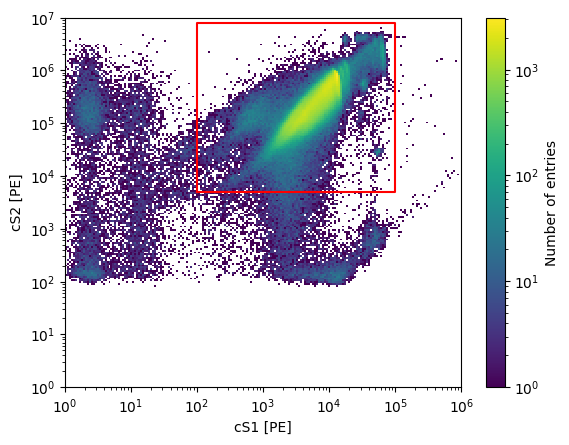

In [12]:
from matplotlib import patches

# plt.figure(figsize=(10, 8))

bin_config = dict(bins=(np.logspace(0, 6, 200), np.logspace(0, 7, 200)))
h = Histdd(df["cs1"], df["cs2"], **bin_config)
h.plot(log_scale=True)

rate_box_cs1 = [100, 1e5]
rate_box_cs2 = [5e3, 8e6]

plt.plot(
    [rate_box_cs1[0], rate_box_cs1[0], rate_box_cs1[1], rate_box_cs1[1], rate_box_cs1[0]],
    [rate_box_cs2[0], rate_box_cs2[1], rate_box_cs2[1], rate_box_cs2[0], rate_box_cs2[0]],
    color='r', label='rate estimate selection'
)


plt.xscale("log")
plt.yscale("log")
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2 [PE]')
#plt.savefig("fig/png/area_cut.png")
plt.show()

In [13]:
sel=True
sel+=(df["cs1"]>rate_box_cs1[0])
sel+=(df["cs1"]<rate_box_cs1[1])
sel+=(df["cs2"]>rate_box_cs2[0])
sel+=(df["cs2"]<rate_box_cs2[1])

In [23]:
print('gamma rate:', len(df[sel])/(7.5*3600),'Hz')

gamma rate: 25.110444444444443 Hz


In [25]:
4/(1000/25)

0.1

In [27]:
0.5**(14/106.6)*24

21.911713735821003

In [31]:
(18.6*0.9)

16.740000000000002

In [34]:
np.sqrt(.3**2+.2**2)*20

7.211102550927979

In [36]:
20/16.5*36

43.63636363636364

NameError: name 'np' is not defined